In [1]:
import yt
import numpy as np
import trident as tri

In [2]:
filename = "~/Repo/yt/doc/source/quickstart/IsolatedGalaxy/galaxy0030/galaxy0030"

In [27]:
ds = yt.load(filename)

ray_start= np.array([0.4, 0, 0.45], dtype=float)
ray_end = np.array([0.4, 0.8, 0.45], dtype=float)

ray = ray_end - ray_start
line_list = ['O VI', 'H I', 'C IV']
norm_vec = [ray[1], -1*ray[0], 0]

yt : [INFO     ] 2019-05-20 10:09:39,926 Parameters: current_time              = 0.00600002000283
yt : [INFO     ] 2019-05-20 10:09:39,928 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-05-20 10:09:39,932 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-20 10:09:39,933 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-20 10:09:39,935 Parameters: cosmological_simulation   = 0.0


## coding up ray

In [29]:
tri.add_ion_fields(ds, ions=line_list, ftype='gas')

yt : [WARNING  ] 2019-05-20 10:10:46,923 Field ('gas', 'H_p0_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2019-05-20 10:10:46,925 Field ('gas', 'H_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2019-05-20 10:10:46,927 Field ('gas', 'H_p0_density') already exists. Not clobbering.
yt : [WARNING  ] 2019-05-20 10:10:46,929 Field ('gas', 'H_density') already exists. Not clobbering.
yt : [WARNING  ] 2019-05-20 10:10:46,930 Field ('gas', 'H_p0_mass') already exists. Not clobbering.
yt : [WARNING  ] 2019-05-20 10:10:46,932 Field ('gas', 'H_mass') already exists. Not clobbering.


In [30]:
ray_start =ds.arr(ray_start, "code_length")
ray_end = ds.arr(ray_end, "code_length")
tri_ray = tri.make_simple_ray(ds,
                              start_position = ray_start,
                              end_position = ray_end,
                              lines = line_list,
			      ftype = 'gas')


yt : [INFO     ] 2019-05-20 10:10:49,519 Getting segment at z = 0.0: [0.4  0.   0.45] unitary to [0.4  0.8  0.45] unitary.
yt : [INFO     ] 2019-05-20 10:10:49,526 Getting subsegment: [0.4 unitary, 0.0 unitary, 0.45 unitary] to [0.4 unitary, 0.8 unitary, 0.45 unitary].
yt : [INFO     ] 2019-05-20 10:10:49,684 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2019-05-20 10:10:49,958 Parameters: current_time              = 0.0060000200028298 code_time
yt : [INFO     ] 2019-05-20 10:10:49,959 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-05-20 10:10:49,964 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-05-20 10:10:49,967 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2019-05-20 10:10:49,973 Parameters: cosmological_simulation   = 0.0


In [50]:
lbd = tri.LineDatabase("lines.txt")

In [51]:
lines = lbd.parse_subset(subsets=['C IV'])
lines

[C IV 1551, C IV 1548]

In [55]:
my =lines[0]

In [58]:
my.wavelength

1550.772

In [25]:
spx = yt.SlicePlot(ds, 'x', 
                   'C_p3_density', 
                   center = [0.5, 0.5, 0.5],
                   width= (1))
spx.annotate_ray(tri_ray, arrow=True)
spx.save("xSlice.png")

yt : [INFO     ] 2019-05-20 09:58:26,462 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-05-20 09:58:26,464 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-05-20 09:58:26,467 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-05-20 09:58:26,469 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-05-20 09:58:26,472 Making a fixed resolution buffer of (('gas', 'C_p3_density')) 800 by 800
yt : [INFO     ] 2019-05-20 09:58:26,735 Saving plot xSlice.png


['xSlice.png']


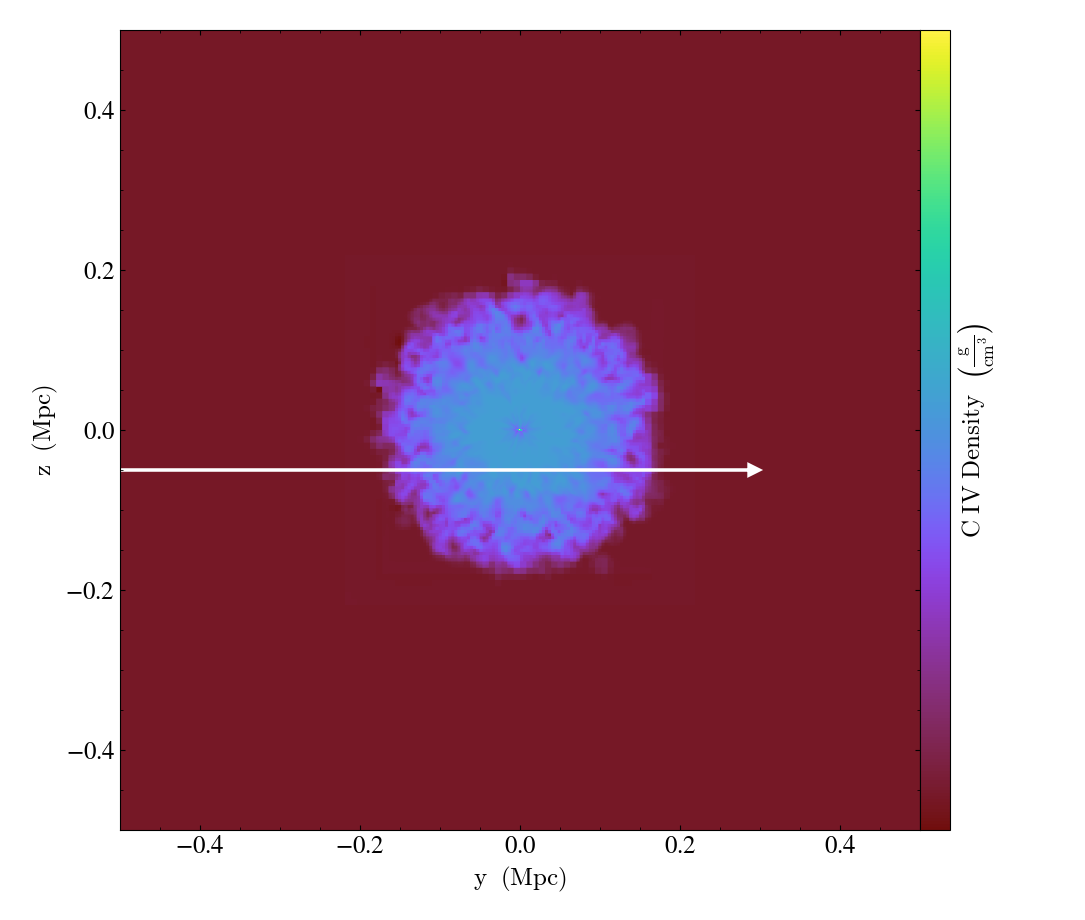

In [22]:
spx

In [ ]:
spx.set_cmap()

In [7]:
#want norm vector that would give same result as x-axis slice
center = (ray_end + ray_start)/2
center[2]=0.5
sp_me= yt.SlicePlot(ds, norm_vec, 'density', 
                    center = center, 
                    north_vector=[0,0,1],
                    width= (1))
sp_me.annotate_ray(tri_ray)
sp_me.save("slice.png")

yt : [WARNING  ] 2019-04-08 20:30:31,111 Ignoring 'north_vector' keyword as it is ill-defined for an AxisAlignedSlicePlot object.
yt : [INFO     ] 2019-04-08 20:30:31,135 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-04-08 20:30:31,137 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-04-08 20:30:31,139 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-04-08 20:30:31,140 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-04-08 20:30:31,142 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2019-04-08 20:30:31,433 Saving plot slice.png


['slice.png']

In [8]:
norm_vec

[1.0, -0.0, 0]

In [9]:
center

YTArray([0.4, 0.5, 0.5]) unitary

In [10]:
sg = tri.SpectrumGenerator('COS-G130M')
spect = sg.make_spectrum(tri_ray, lines=line_list)

#s =sg.plot_spectrum('spec_raw.png')

yt : [INFO     ] 2019-04-08 20:30:31,829 Setting instrument to COS-G130M
yt : [INFO     ] 2019-04-08 20:30:31,877 Allocating for 1.180e+02 particles (index particle type 'all')
yt : [INFO     ] 2019-04-08 20:30:31,883 Identified 7.300e+01 octs
yt : [INFO     ] 2019-04-08 20:30:32,240 Creating O_p5_number_density from ray's density, temperature, metallicity.
/home/bb/.local/lib/python2.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
yt : [INFO     ] 2019-04-08 20:30:32,353 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2019-04-08 20:30:32,429 Creating spectrum
yt : [INFO     ] 2019-04-08 20:30:32,480 12 out of 118 line components will be deposited as unresolved lines.
Adding line - O VI 1038 [1037.613000 A]: : 100%|██████████| 118/118 [00:00<00:00, 3591.43it/s]
yt : [INFO     ] 2019-04-08 20:30:32,519 13 out of 11

In [11]:
sg.save_spectrum("spect.h5")

yt : [INFO     ] 2019-04-08 20:30:33,888 Writing spectrum to hdf5 file: spect.h5.


In [12]:
def ion_p_name(ion):
    return ion.split()[0]+'_p'+str(tri.from_roman(ion.split()[1])-1)

i = 'C IV'
ion_p_name(i)

'C_p3'

In [13]:
import h5py

In [14]:
ray = h5py.File("ray.h5")
i.split?

In [15]:
ray["grid"]['dl']

<HDF5 dataset "dl": shape (118,), type "<f8">

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
y = np.array([2, 4, 6, 8, 10])

In [18]:
x = np.arange(0, 5)

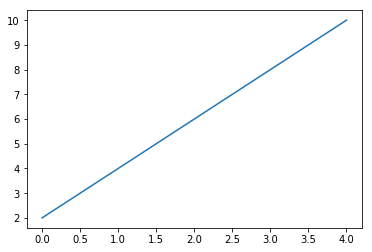

In [19]:
fig = plt.figure()
plot = plt.plot(x,y)

In [20]:
def pp():
    plt.plot(x, y)

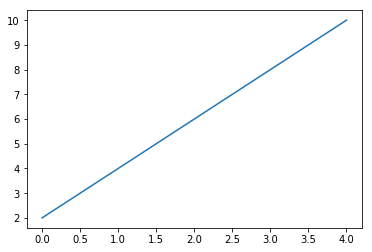

In [21]:
fig

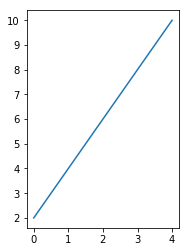

In [22]:
figu = plt.figure()
figu.add_subplot(121)
pp()

In [23]:
import h5py

In [24]:
s = h5py.File('ray.h5')

In [25]:
s.close()


In [26]:
s

<Closed HDF5 file>

In [27]:
from os import system

In [28]:
print(system("touch x"))


0


In [29]:
! ls


plot_slice_ndpl_spectra.py	slice_and_ray.py   spec_raw.png     xSlice.png
plot_slice_ndpl_spectra.pyc	slice_nope.png	   spect.h5
ray.h5				slice.png	   x
slice_and_ray_playground.ipynb	spec_raw_nope.png  xSlice_nope.png


In [30]:
from os import remove

In [31]:
remove('x')

In [32]:
frb = spx.frb

In [33]:
from matplotlib.colors import LogNorm

yt : [INFO     ] 2019-04-08 20:30:34,760 Making a fixed resolution buffer of (density) 800 by 800


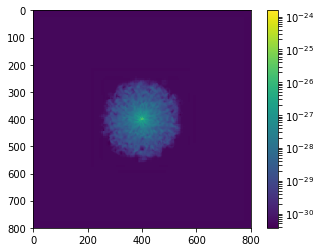

In [34]:
plt.imshow(np.array(frb['density']), norm=LogNorm())
plt.colorbar()


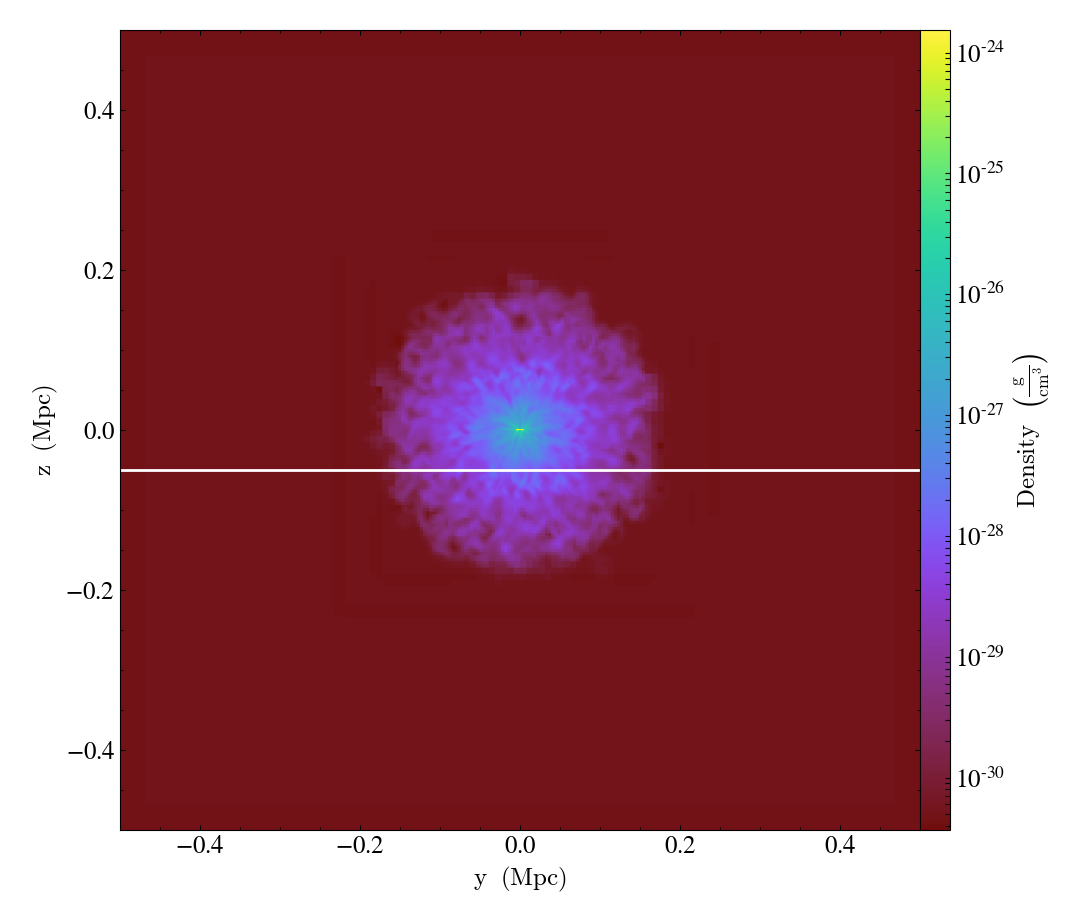

In [35]:
spx

In [36]:
cut = ds.cutting(norm_vec,
                    center, 
                    north_vector=[0,0,1])
cut.annotate_ray(ray)

AttributeError: 'YTCuttingPlane' object has no attribute 'annotate_ray'

In [ ]:
width = (1, 'Mpc') # we want a 1.5 mpc view
res = [1000, 1000] # create an image with 1000x1000 pixels
frb = cut.to_frb(width, res)

In [ ]:
frb

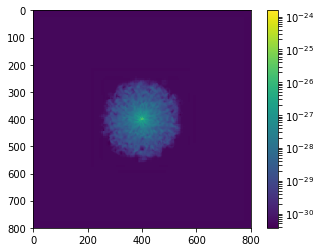

In [37]:
plt.imshow(np.array(frb['density']), norm=LogNorm())
plt.colorbar()


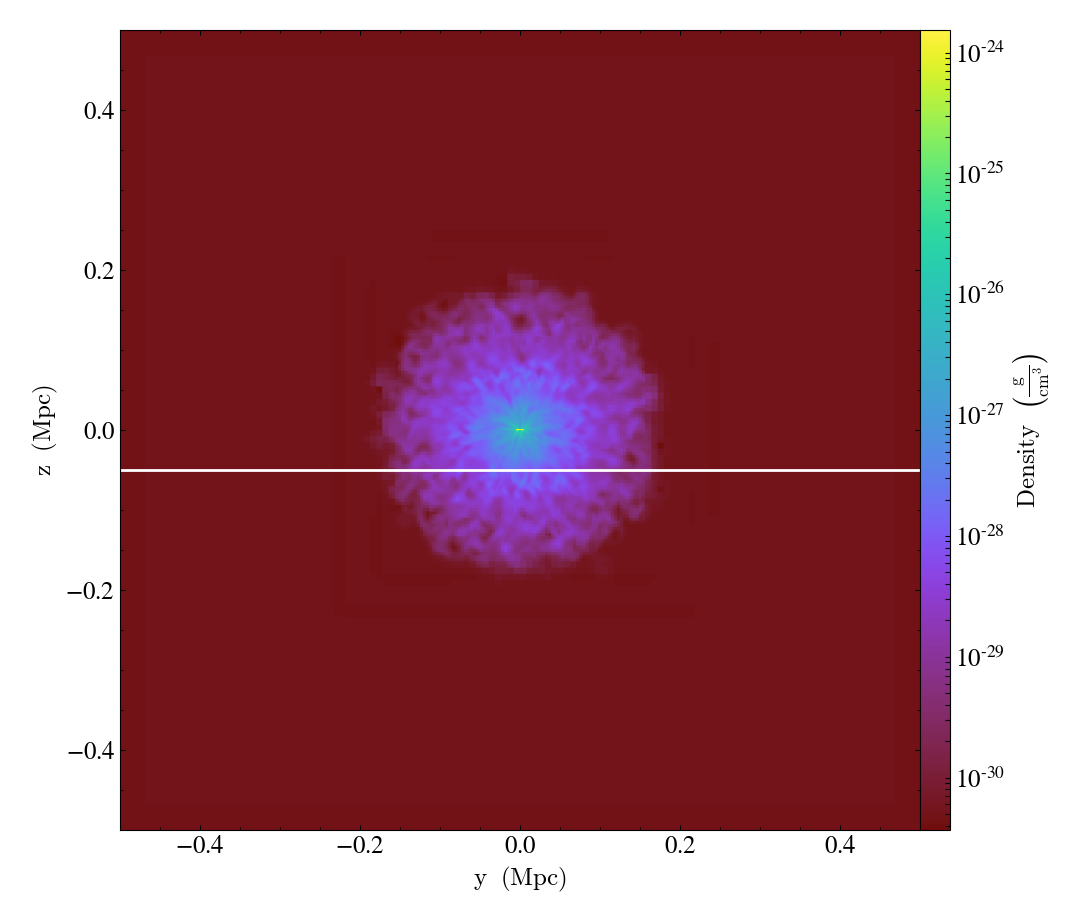

In [38]:
spx

In [39]:
from mpl_toolkits.axes_grid1 import AxesGrid

yt : [INFO     ] 2019-04-08 21:51:42,753 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-04-08 21:51:42,755 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-04-08 21:51:42,757 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-04-08 21:51:42,759 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-04-08 21:51:42,761 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



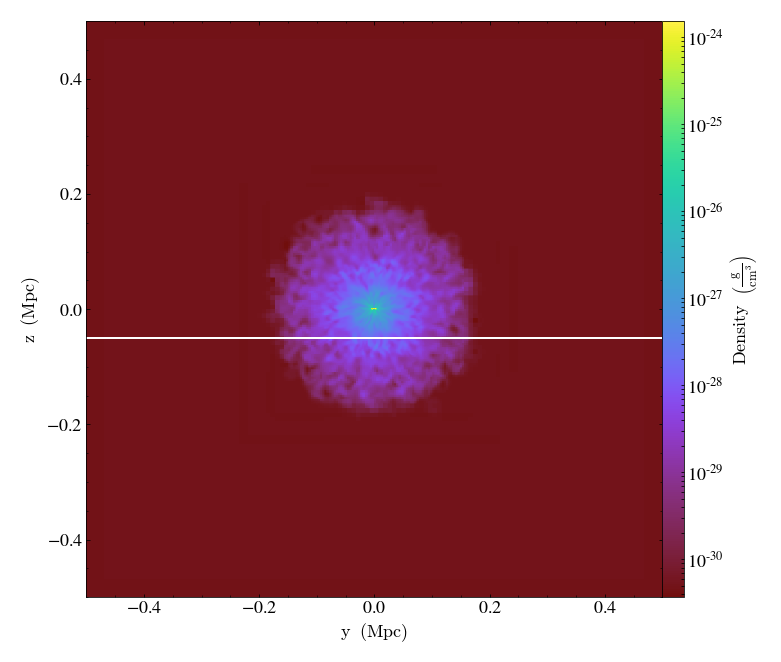

In [127]:
spx = yt.SlicePlot(ds, 'x', 
                   'density', 
                   center = [0.5, 0.5, 0.5],
                   width= (1))
spx.annotate_ray(tri_ray)

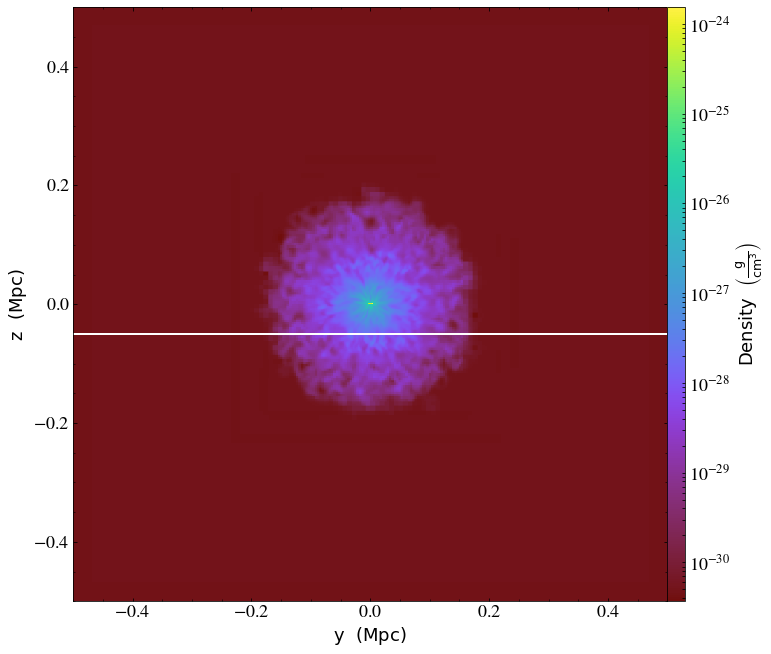

In [128]:
import yt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

fig1 = plt.figure(figsize=(10, 10))

# See http://matplotlib.org/mpl_toolkits/axes_grid/api/axes_grid_api.html
# These choices of keyword arguments produce a four panel plot that includes
# four narrow colorbars, one for each plot.  Axes labels are only drawn on the
# bottom left hand plot to avoid repeating information and make the plot less
# cluttered.
grid = AxesGrid(fig1, (0.075,0.075,0.85,0.85),
                nrows_ncols = (1, 1),
                axes_pad = 1.0,
                label_mode = "L",
                share_all = True,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="3%",
                cbar_pad="0%")

fields = ['density']

# Create the plot.  Since SlicePlot accepts a list of fields, we need only
# do this once.
p = spx

# Velocity is going to be both positive and negative, so let's make these
# slices use a linear colorbar scale
p.set_log('velocity_x', False)
p.set_log('velocity_y', False)


# For each plotted field, force the SlicePlot to redraw itself onto the AxesGrid
# axes.
for i, field in enumerate(fields):
    plot = p.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]



# Finally, redraw the plot on the AxesGrid axes.
p._setup_plots()

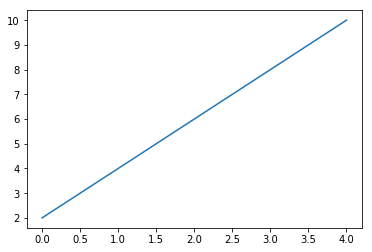

In [129]:
ax = fig1.add_subplot(222)
plt.plot(x, y)

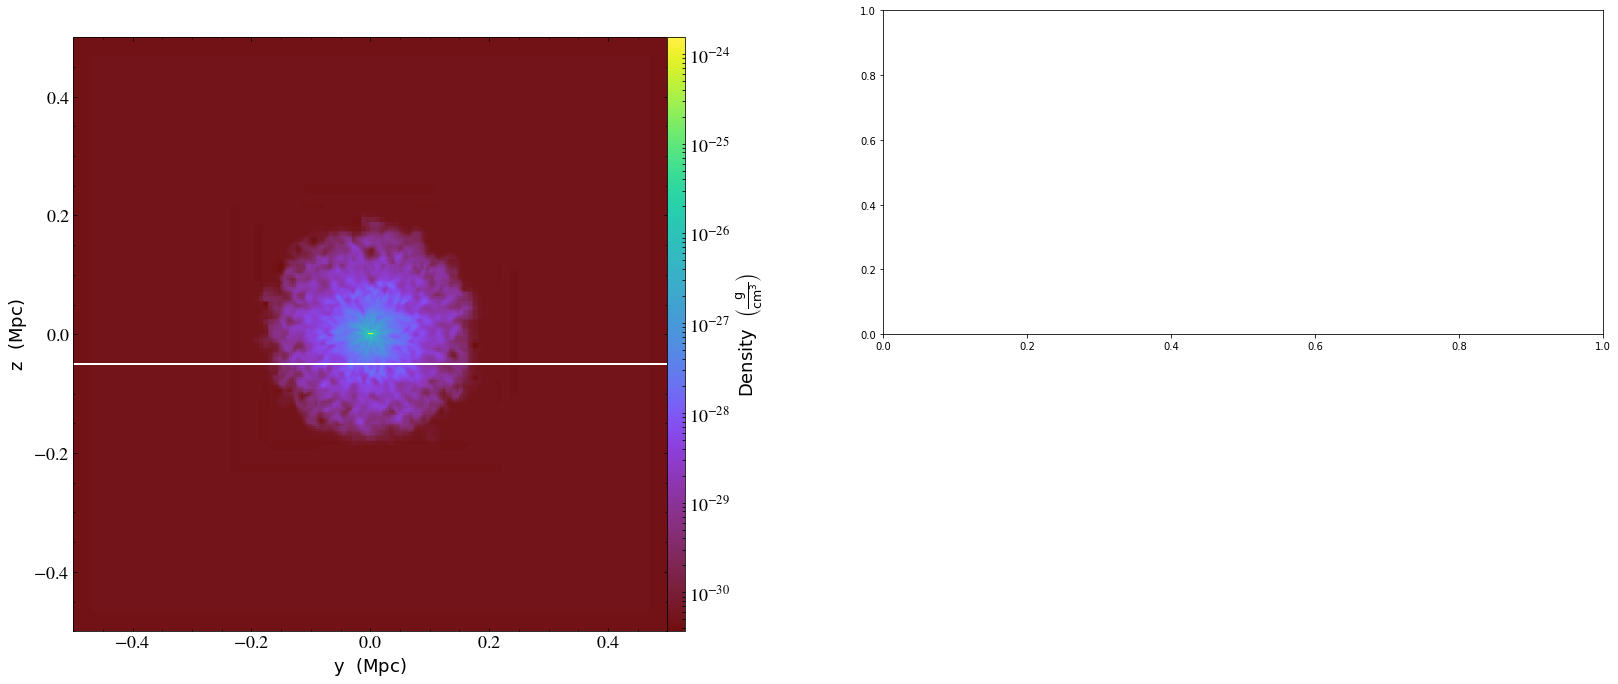

In [130]:
ax.set_position([1.2, 0.5, 1, 0.45])
fig1

In [131]:
ax2 = fig1.add_subplot(224)
ax2.plot(x, y)


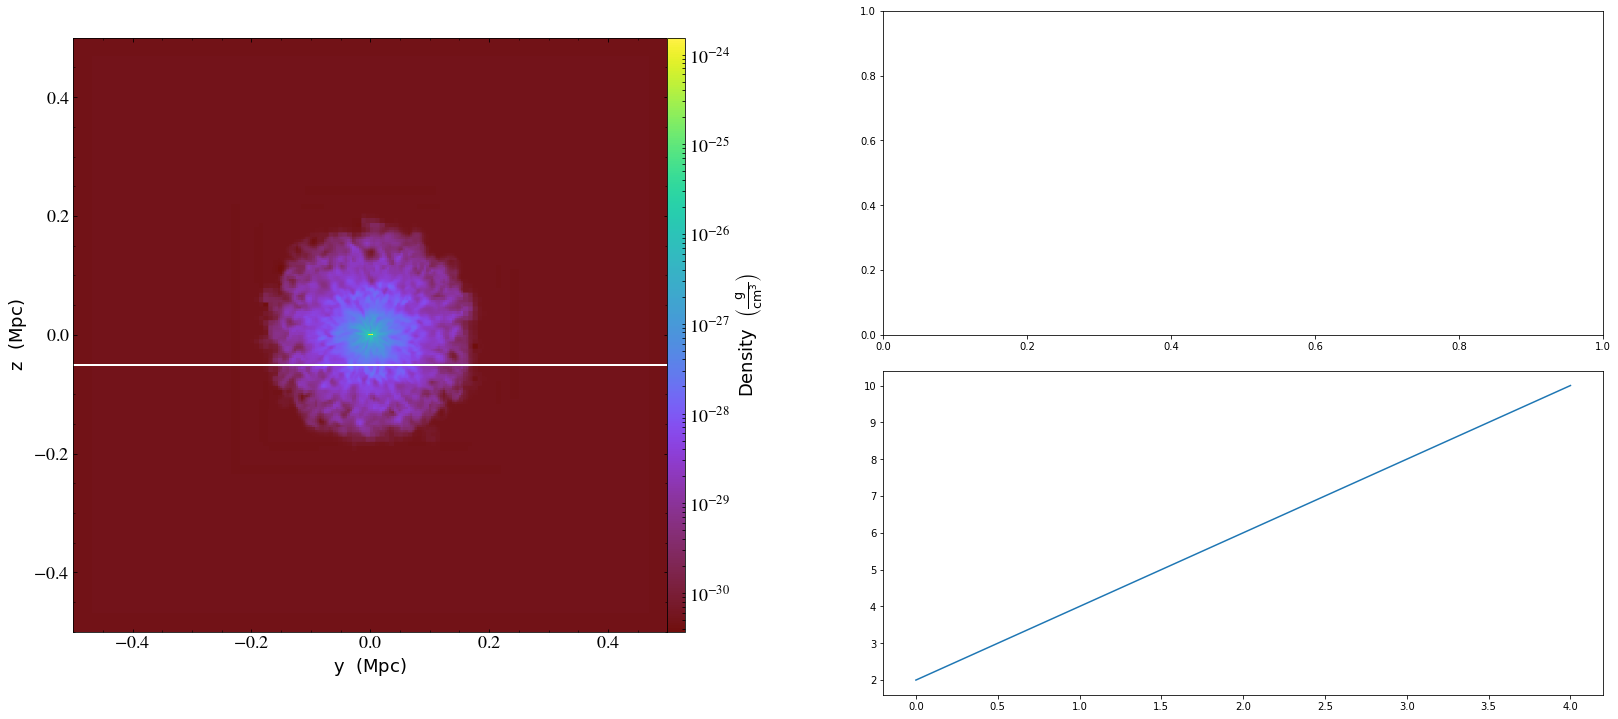

In [132]:
ax2.set_position([1.2, 0, 1, 0.45])
fig1

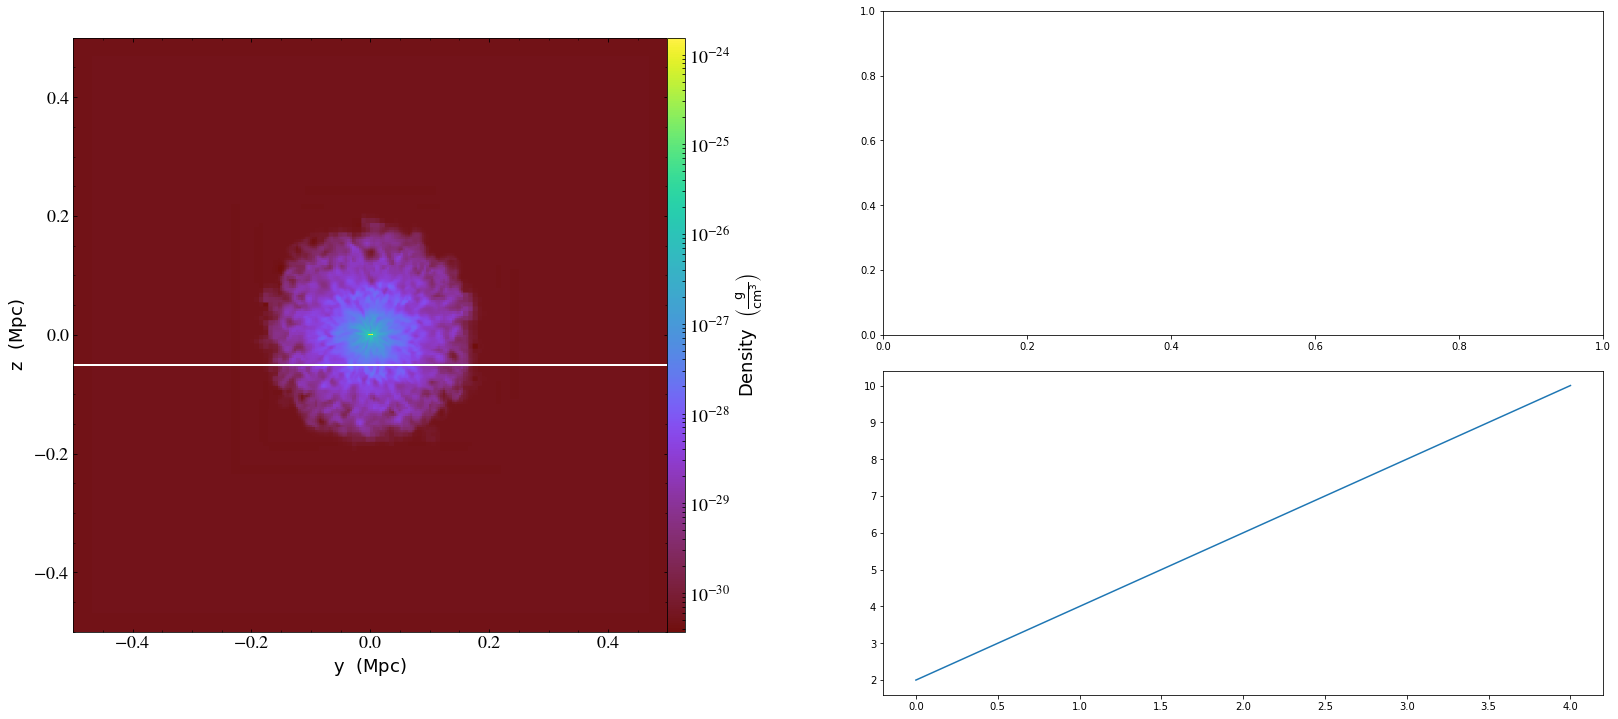

In [133]:
fig1

In [126]:
fig1.savefig('x', bbox_inches='tight')

yt : [INFO     ] 2019-04-08 21:03:43,999 Saving plot galaxy0030_Slice_x_density.png


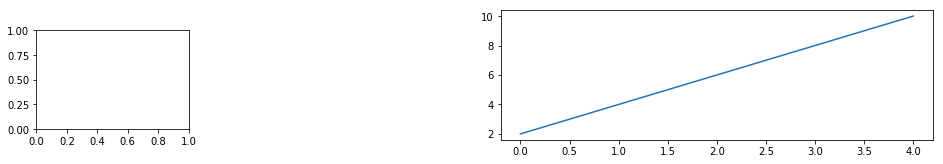

In [101]:
fig = plt.figure()

ax = fig.add_subplot(221)
dens_plot = spx.plots['density']

dens_plot.figure = fig
dens_plot.axes = ax

new_ax2 = fig.add_subplot(222)
new_ax2.plot(x, y)

new_ax3 = fig1.add_subplot(224)
new_ax3.plot(x, y)

new_ax2.set_position([1.2, 0.5, 1, 0.45])
new_ax3.set_position([1.2, 0, 1, 0.45])

spx.save()
fig.savefig('ftt.png')

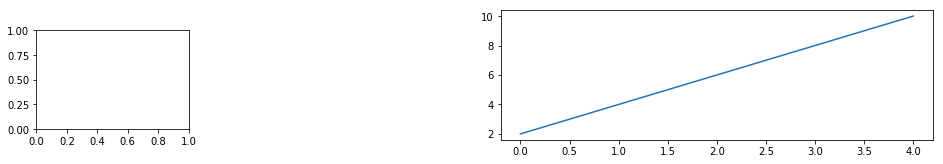

In [100]:
fig


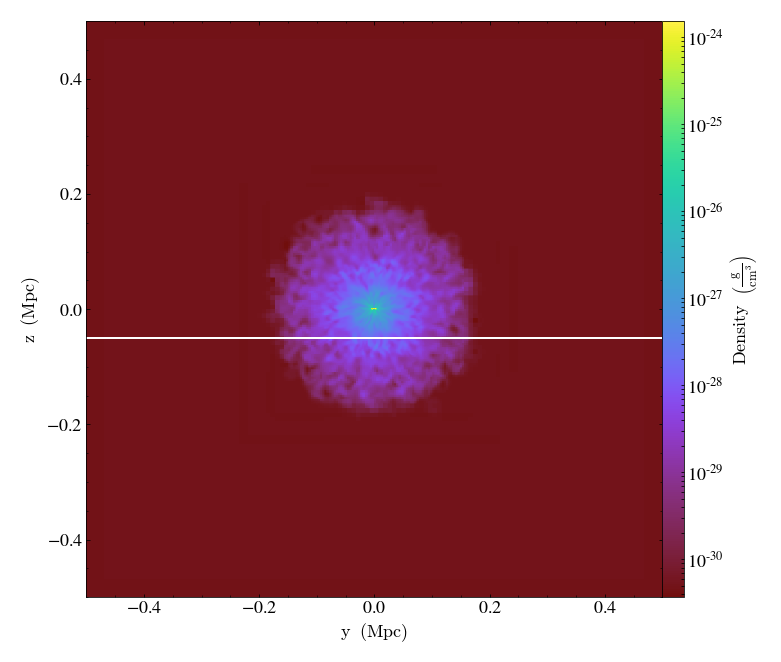

In [92]:
spx
fig.add_subplot

In [103]:
slc = yt.SlicePlot(ds, 'x', 'density')
dens_plot = slc.plots['density']

fig = dens_plot.figure
ax = dens_plot.axes
#colorbar_axes = dens_plot.cax

new_ax2 = fig.add_subplot(212)
new_ax2.set_position([1.2, 0.5, 1, 0.45])
slc.save("his")

yt : [INFO     ] 2019-04-08 21:05:44,666 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-04-08 21:05:44,668 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-04-08 21:05:44,670 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-04-08 21:05:44,671 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-04-08 21:05:44,674 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2019-04-08 21:05:45,037 Saving plot his_Slice_x_density.png


['his_Slice_x_density.png']